## CNN trained on the MNIST dataset for image classification 

In this notebook we are going to get familiar with PyTorch, a deep learning library, to train a Convolutional Neural Network (CNN). The network will be trained on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which contains small images of handwritten numerical digits. By the end of this training, the model should be able to accurately classify images with numerical digits.

Training a network on the MNIST dataset has become the 'hello world' of machine learning. 

First let's do some imports:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets 
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np



##### Define our hyperparameters

Now let's define our hyperparameters. Add a comment for each variable. What are these variables?

In [2]:
device = 'cpu'
momentum = 0.9
num_epochs = 10
num_classes = 10
batch_size = 100
learn_rate = 0.001
data_path = 'data/ml'

##### Image transformations

torchvision.transforms.ToTensor converts a python image (PIL) or numpy.ndarray to tensor.

torchvision.transforms.Normalize(mean, std, inplace=False) normalizes a tensor image with mean and standard deviation.

Look in [here](https://pytorch.org/vision/0.9/transforms.html) for more information.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

##### Create our train and test datasets

Torchvision provides many built-in datasets in the torchvision.datasets module. MNIST is one of them. You can find more [here](https://pytorch.org/vision/stable/datasets.html).

MNIST is composed of a train set (60,000 images) and a test set (10,000 images). Only the train set will be used for the training. The test set is meant to be used after the training is completed, to see how the model performs on unseen data.

In [4]:
mnist_trainset = datasets.MNIST(root='data/ml', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='data/ml/test', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 17666044.70it/s]


Extracting data/ml\MNIST\raw\train-images-idx3-ubyte.gz to data/ml\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting data/ml\MNIST\raw\train-labels-idx1-ubyte.gz to data/ml\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 17950532.47it/s]


Extracting data/ml\MNIST\raw\t10k-images-idx3-ubyte.gz to data/ml\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4539082.38it/s]


Extracting data/ml\MNIST\raw\t10k-labels-idx1-ubyte.gz to data/ml\MNIST\raw



100%|██████████| 9912422/9912422 [00:00<00:00, 18209108.93it/s]


Extracting data/ml/test\MNIST\raw\train-images-idx3-ubyte.gz to data/ml/test\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting data/ml/test\MNIST\raw\train-labels-idx1-ubyte.gz to data/ml/test\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 15164399.93it/s]


Extracting data/ml/test\MNIST\raw\t10k-images-idx3-ubyte.gz to data/ml/test\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4523991.63it/s]

Extracting data/ml/test\MNIST\raw\t10k-labels-idx1-ubyte.gz to data/ml/test\MNIST\raw



##### Visualise a sample image along with its respective label

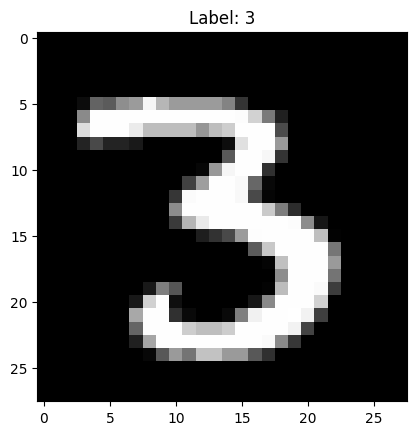

In [5]:
img_num = 12 # change this number to have a glimpse into another item of the trainset

# using matplotlib
# plotting for one image
plt.figure()
plt.title(f"Label: {mnist_trainset.targets[img_num]}")
plt.imshow(mnist_trainset.data[img_num], cmap='gray')
plt.show()

##### Create our train and test dataloaders

A DataLoader wraps an iterable around the Dataset, allowing us to iterate over batches of data when training. The DataLoader can shuffle the data at the beginning of each epoch if the shuffle parameter is set to True. Shuffling helps in randomizing the order of data samples and prevents the model from learning any order-specific patterns.

In [6]:
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

##### Define our CNN

In [26]:
class ClassificationNetwork(nn.Module):
    def __init__(self):
        #
        super(ClassificationNetwork, self).__init__()
        #
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, padding=1)
        #
        self.pool = nn.MaxPool2d(2, 2)
        #
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=1)
        #
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=1)
        #
        self.fc1 = nn.Linear(64 * 4 * 8, 256)
        #
        self.fc2 = nn.Linear(256, 4)

    def forward(self, x):
        #
        x = F.relu(self.conv1(x))
        #
        x = self.pool(x)
        #
        x = F.relu(self.conv2(x))
        #
        x = self.pool(x)
        #
        x = torch.flatten(x, 1)
        #
        x = F.relu(self.fc1(x))
        #
        x = self.fc2(x)
        #
        return x

##### Setup core training objects

Look into available loss functions [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

Look into available optimizers [here](https://pytorch.org/docs/stable/optim.html).

In [27]:
model = ClassificationNetwork()
model.load_state_dict(torch.load('./models/img_classfier_model.pt'))
#model = torch.load('./models/img_classfier_model.pt')
model.to(device)

# selecting cross entropy as the loss function for our classification
criterion = nn.CrossEntropyLoss()

# selecting stochastic gradient descent as our optimization algorithm
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate, momentum=momentum)

# print model architecture
model.eval()

RuntimeError: Error(s) in loading state_dict for ClassificationNetwork:
	Unexpected key(s) in state_dict: "conv3.weight", "conv3.bias". 

##### Training

In [ ]:
train_losses = []

for epoch in range(num_epochs): 
    train_loss = 0.0
    
    # training loop
    for batch_idx, (data, target) in enumerate(train_loader):
        # get data
        inputs = data.to(device)
        labels = target.to(device)
        
        # zero the gradients
        optimizer.zero_grad()
        # forward pass
        predictions = model(inputs)
        # compute the loss
        loss = criterion(predictions, labels)
        # backpropagate
        loss.backward()
        # update the parameters, i.e. weights
        optimizer.step()

        # save statistics to plot later
        train_loss += loss.item()
    
    # normalise cumulative losses to dataset size
    train_loss = train_loss / len(train_loader)
    # added cumulative losses to list to plot later
    train_losses.append(train_loss)
    
    print(f'Epoch {epoch + 1}, train loss: {train_loss:.3f}')

Epoch 1, train loss: 1.227
Epoch 2, train loss: 0.269
Epoch 3, train loss: 0.175
Epoch 4, train loss: 0.135
Epoch 5, train loss: 0.111
Epoch 6, train loss: 0.097
Epoch 7, train loss: 0.087
Epoch 8, train loss: 0.079
Epoch 9, train loss: 0.074
Epoch 10, train loss: 0.069


##### Plot loss values as stored during training

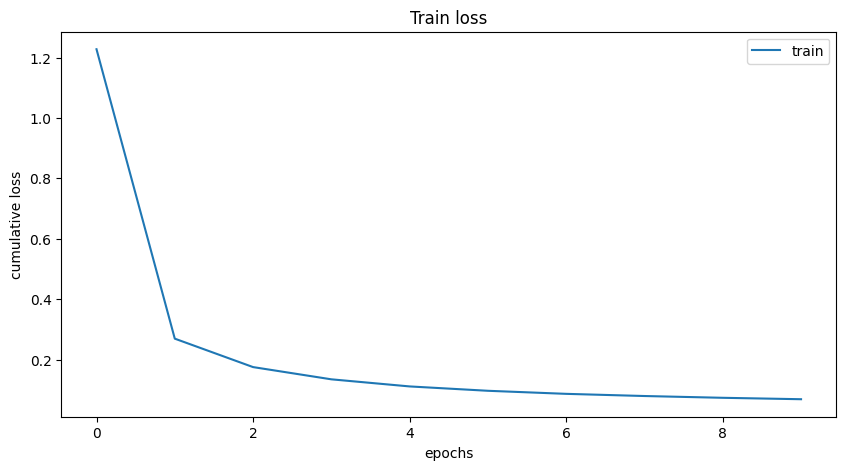

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Train loss")
plt.plot(train_losses,label="train")
plt.xlabel("epochs")
plt.ylabel("cumulative loss")
plt.legend()
plt.show()

##### Test model on the MNIST test dataset

A process also known as Inference:

In [ ]:
correct = 0
total = 0
# disabling gradient computation since there is no need to update any parameters
with torch.no_grad():
    # iterate over batches in the test_loader
    for data, target in test_loader:
        # forward pass
        predictions = model(data)
        # get the index of the maximum predicted value (predicted class)
        # the underscore is a variable to be ignored - a placeholder for the maximum values
        _, predicted = torch.max(predictions.data, 1)
        # update the total number of samples by adding the current batch
        total += target.size(0)
        # update the count of correct predictions by summing the correct predictions in the current batch
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy}\n Number of Correct Predictions: {correct} out of {total}' )

Test Accuracy: 0.9802
 Number of Correct Predictions: 9802 out of 10000


##### Visualise some predictions based on the MNIST test dataset

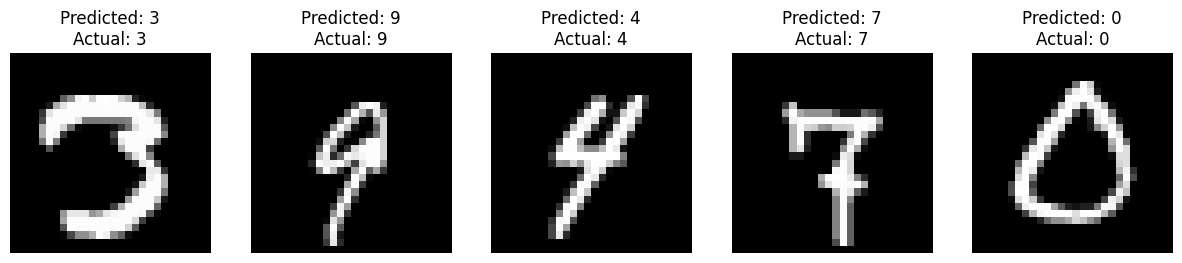

In [ ]:
# disabling gradient computation since there is no need to update any parameters
with torch.no_grad():
    num_images = 5
    figure = plt.figure(figsize=(15, 5))

    for i in range(1, num_images + 1):
        sample_idx = torch.randint(len(mnist_testset), size=(1,)).item()
        img, label = mnist_testset[sample_idx]
        img = img.unsqueeze(0).to(device)  # needs an extra batch dimension
        output = model(img)
        _, predicted = torch.max(output.data, 1)

        figure.add_subplot(1, num_images, i)
        plt.title(f"Predicted: {predicted.item()}\nActual: {label}")
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")

    plt.show()

##### Visualise some predictions based on external inputs

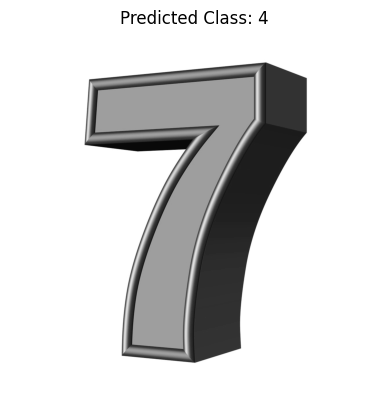

In [ ]:
from PIL import Image

img_path = './data/sample-numbers/seven-rgb.jpg'

# function to preprocess the image
def preprocess_image(image_path):
    # convert the image to black and white and transform it to match the required input format for the model
    img = Image.open(image_path).convert("L")
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    img_tensor = transform(img).unsqueeze(0).to(device)
    # img is an array for the plot and img_tensor is a tensor to pass through the model
    return img, img_tensor

# preprocess the image
image, tensor_image = preprocess_image(img_path)

with torch.no_grad():
    # forward pass
    prediction = model(tensor_image)
    # get the predicted class
    _, predicted_class = torch.max(prediction, 1)

plt.imshow(image, cmap='gray')
plt.title(f'Predicted Class: {predicted_class.item()}')
plt.axis('off')
plt.show()

##### Save the model

In [ ]:
torch.save(model.state_dict(), './models/mnist_model_CNN.pt')

### Tasks to do in-class and further explore at home

**Task 1:** Run all the cells in this code to train a CNN on the MNIST dataset.

**Task 2:** This notebook is almost identical to the notebook `01`. The only difference lies in the architecture of the neural network. Go through the respective call where we define the CNN architecture and add comments wherever you see a `#`. Consult [the pytorch documentation page](https://pytorch.org/docs/stable/index.html) for anything you are unsure about. 